### Setup packages 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=0b9db790e4bacf23cb5ac0dc4017027a8d0e7bbb89a6474ccc198e039d6fa69f
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 7.46 ms (started: 2022-07-10 17:59:07 +00:00)


In [ ]:
from plotnine import *
from plotnine.themes import *

time: 2.22 s (started: 2022-07-10 17:59:07 +00:00)


In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp
from tqdm import tqdm

time: 2.91 s (started: 2022-07-10 17:59:09 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [ ]:
paper_name = "dgm_hjb"

time: 876 µs (started: 2022-07-10 17:59:12 +00:00)


In [ ]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

#make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 13.2 ms (started: 2022-07-10 17:59:12 +00:00)


In [ ]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 15.3 ms (started: 2022-07-10 17:59:12 +00:00)


In [ ]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from torch.utils.data import DataLoader


time: 3.2 s (started: 2022-07-10 17:59:12 +00:00)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 3.84 s (started: 2022-07-10 17:59:15 +00:00)


### Shared functions across models

In [ ]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 83.5 ms (started: 2022-07-10 17:59:19 +00:00)


In [ ]:
# plot_report(train)
# plot_activation_mean(train)

time: 2.37 ms (started: 2022-07-10 17:59:19 +00:00)


In [ ]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 13.2 ms (started: 2022-07-10 17:59:19 +00:00)


In [ ]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 134 ms (started: 2022-07-10 17:59:19 +00:00)


In [ ]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 136 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 19.8 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 27.3 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 5.77 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 9.77 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
# def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

#   model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
#   if eqObject is not None:
#     try:
#         beta = getattr(eqObject,"beta")
#         beta_str = str(beta).replace('.','p')
#         model_id_str = model_id_str + f"_beta{beta_str}"
#     except AttributeError:
#         pass
#     try:
#         wgamma = getattr(eqObject,"wgamma")
#         wgamma_str = str(wgamma).replace('.','p')
#         model_id_str = model_id_str + f"_wgamma{wgamma_str}"
#     except AttributeError:
#         pass
  
#   torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
#   df_at_hookintervals = None
#   train_losses = None
#   validation_losses = None
#   try:
#       df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
#       if df_at_hookintervals is not None:
#         df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

#   try:
#       train_losses = getattr(trainObj,"train_losses")
#       if train_losses is not None:
#         train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
#       # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

#   try:
#       validation_losses = getattr(trainObj,"validation_losses")
#       if validation_losses is not None:
#         validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 45.7 ms (started: 2022-07-10 17:59:20 +00:00)


In [ ]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{wgamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 136 ms (started: 2022-07-10 17:59:20 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [ ]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 6.26 ms (started: 2022-07-10 17:59:20 +00:00)


#### MertonUtilityNet

In [ ]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 70.3 ms (started: 2022-07-10 17:59:20 +00:00)


#### MertonPiNet

In [ ]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 44.8 ms (started: 2022-07-10 17:59:20 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)


time: 313 ms (started: 2022-07-10 17:59:20 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [ ]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 106 ms (started: 2022-07-10 17:59:21 +00:00)


#### PiEquation

In [ ]:
class PiEquation():

    def __init__(self, pi_net, du_dx, d2u_dx2, curr_epoch=0):
        self.pi_net = pi_net
        self.grads = du_dx, d2u_dx2
        self.curr_epoch = curr_epoch

        #self.wgamma = 0.0001
        #seld.du_dx = Variable(du_dx, requires_grad=False)
        #self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      
      #du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      #d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here
      du_dx, d2u_dx2 = grads

      #print('gradient shapes:', du_dx.shape, d2u_dx2.shape)

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      #print('pi_net prediction shape:', pi_net_preds.shape)
      
      intC = None
      #  time, wealth, mu, r, sigma
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1))
        #print('loss1 shape:', loss_1.shape)
        
        # r * wealth
        loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)
        #print('loss2 shape:', loss_2.shape)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        #x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 97.4 ms (started: 2022-07-10 17:59:21 +00:00)


#### TrainInternalPiWithDGM


In [ ]:
class TrainInternalPiWithDGM():
    
    def __init__(self, u_equation, pi_equation, BATCH_SIZE, epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.early_stop_counter = 0

        self.stop_epoch = 0

        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        #self.loss_multiply = loss_multiply

        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U", sample_batch = None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        #self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        # set it to train mode
        self.pi_model.pi_net.train()
        
        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        if self.u_model.pi_optim_state is not None:
            optimizer.load_state_dict(self.u_model.pi_optim_state)  ## check 
        
        #if self.u_model.pi_optim_state is None:
        #    optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        #else:
        #    optimizer = self.u_model.pi_optim_state


        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  

            loss  = 1e4 * loss_calc_method(x_internal, self.pi_model.grads, keep_batch = False )            
            # print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")
            
            #self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
            #                                                                                         keep_batch = False )
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
            #  self.validation_losses[e,:] = validation_loss_list
            #
            #if self.use_early_stop:
            #  loss_to_check = loss
            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    self.early_stop_counter = 0
            #  else:
            #    self.early_stop_counter += 1
            #  if self.early_stop_counter>=self.early_stop_patience:
            #    # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.pi_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                #print("Unet Epoch {} - Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, e , self.lr , loss_avg))
                print("Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.u_model.pi_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 499 ms (started: 2022-07-10 17:59:21 +00:00)


#### MertonEquation

In [ ]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net

        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 0.5

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        #self.loss_multiply = 1.0

        #self.FORCE_MU = None
        #self.FORCE_R = None
        #self.FORCE_SIGMA = None

        self.epoch_of_u = None
        #self.adapt_pi_epochs = False
        #self.start_adapt_epochs = [ [500, 1000, 2000, 5000, 10000, 15000 ], [4, 8, 10 ,20, 40, 60] ]
        #self.was_loss_beaten = False
        self.pi_optim_state = None

        #self.pi_net.train()

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size):
      mu_candidate = self.MAX_MU * torch.rand([size, 1])
      r_candidate = mu_candidate * torch.rand([size, 1])  # ensuring that r is lower than mu
      return mu_candidate, r_candidate

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            #range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size)
            sigma_sample_internal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # time to maturity
                                                    self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size)
            sigma_sample_terminal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1), # time to maturity
                                                   self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def get_num_pi_epochs(self):
      #if self.adapt_pi_epochs and self.was_loss_beaten:
      #  if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
      #    return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      
      return self.pi_net_epoch

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      create_graph=True, allow_unused=True
                                      )[0][:,1].reshape(-1,1)
        
        return du_dt, du_dx, d2u_dx2
    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def dHdx(self, x, gamma=1):
        
        return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    def d2Hdx2(self, x, gamma=1):
        
        return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        u_net_val = util_network(x_internal)
        #print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)
        #print('Unet derivatives shape:', du_dt.shape, du_dx.shape, d2u_dx2.shape)


        pi_model = PiEquation(self.pi_net, du_dx.detach(), d2u_dx2.detach())
        pi_model.curr_epoch = self.epoch_of_u              
        
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, 
                                            x_internal.shape[0], 
                                            self.get_num_pi_epochs(), 
                                            self.pi_net_lr, 
                                            debug=True, 
                                            loss_multiply=1.0)
        #pi_trainer.use_early_stop = True
        #pi_trainer.early_stop_patience = min(20,math.ceil(self.pi_net_epoch/10.0))
        
        pi_trainer.train(sample_batch=(x_internal, x_terminal))
        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          
          pi_net_preds = self.pi_net(x_internal)
          #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
          pi_net_preds = pi_net_preds.detach().reshape(-1,1)
          #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) 
          #print('interim loss1 in unet shape:', intC_loss_1.shape)
          
          # r * wealth
          intC_loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)  
          #print('interim loss2 in unet shape:', intC_loss_2.shape)
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
          #print('interim loss3 in unet shape:', intC_loss_3.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(util_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - util_network(x_terminal)) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        return intC, terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        #x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ 1e4 * loss_equalWeightedByType , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 100*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    100*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 3.13 s (started: 2022-07-10 17:59:21 +00:00)


#### Save info from run

In [ ]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "wgamma" : eqObject.wgamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "wgamma" : eqObject.wgamma,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 49.1 ms (started: 2022-07-10 17:59:25 +00:00)


#### TrainHJBMertonWithDGM

In [ ]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        #self.history_mean_hooks = [] 
        #self.history_surfaces_hooks = None       
        #self.history_tl = []
        #self.history_internal = []
        #self.history_terminal = []
        #self.history_initial = []              
        #self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.monitored_loss_type = "Train_L2"
        #self.early_stop_counter = 0
        self.stop_epoch = 0
        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        #self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        #self.model.adapt_pi_epochs = True

        # self.epoch_of_u = None
        # self.adapt_pi_epochs = False
        # self.start_adapt_epochs = [ [500, 1000, 2000, 5000 ], [4, 8, 10 ,20] ]
        # self.was_loss_beaten = False


        #full_dataset = self.model.sample(sample_method_X = sample_method_X, size=100000)
        #full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        #full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

            #batch_size_used = self.BATCH_SIZE
            #if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
            #  batch_size_used = self.BATCH_SIZE*20
            #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)

                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]

            #    self.train_losses[e,:] = [ to_cpu_detach(loss), to_cpu_detach(internal), to_cpu_detach(terminal)]
            #                           to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
            #                           to_cpu_detach(losses_equalWeightedByType_abs)]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
            #                                                                                         keep_batch = False,
            #                                                                                         util_network =self.net)
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
            #  self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")

            
            #if self.use_early_stop or self.model.adapt_pi_epochs:
            #  loss_to_check = losses_equalWeightedByType
            #  if self.monitored_loss_type == "Train_L2":
            #    pass
            #  elif self.monitored_loss_type == "Train_L1":             
            #    loss_to_check = losses_equalWeightedByType_abs
            #  elif self.monitored_loss_type == "Train_MAXL2":             
            #    loss_to_check = max_loss_L2

            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
            #      self.model.was_loss_beaten = False  # this was an increased batch for longer run, so we discount the loss here
            #      if self.model.adapt_pi_epochs and e>(self.model.start_adapt_epochs[0][0]):
            #        save_model_train(self, self.model, lr, eqLossFn, sample_method, self.best_loss, batch_size_used, e)  # but we still store it
            #    else:
            #      self.model.was_loss_beaten = True
            #    self.early_stop_counter = 0
            #    # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
            #  else:
            #    self.early_stop_counter += 1
            #    self.model.was_loss_beaten = False
            #  if self.early_stop_counter>=self.early_stop_patience and self.use_early_stop:
            #    print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                #x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print('internal loss:', internal , 'terminal loss:', terminal)

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


                # plot the fitted value function vs the closed form (ideally straight line...)
                #u_internal_sample = x_internal.clone()
                #mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                #u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                #gamma = 1
                #time = u_internal_sample[:,0].cpu().detach()
                #wealth = u_internal_sample[:,1].cpu().detach()
                #mu = u_internal_sample[:,2].cpu().detach()
                #r = u_internal_sample[:,3].cpu().detach()
                #sigma = u_internal_sample[:,4].cpu().detach()
                
                #u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                #unet_preds = self.net(u_internal_sample)
                #du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                #pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                #print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                #print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                #print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                #print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                #u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                #htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                #dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                #print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                #dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                #       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                #print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                #self.history_tl.append( loss_avg )
                #self.history_internal.append( internal )
                #self.history_terminal.append( terminal )
                
                #if self.debug == True and (self.validation_sample is not None):
                #    mean = []
                #    for l in self.hooks:
                #        mean.append(torch.mean( self.hooks[l] ).item())
                #    self.history_mean_hooks.append( mean )
                #    xinternal, xterminal = self.validation_sample
                #    xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                #    xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                #    xinternal_res = self.model.u_net(xinternal_expanded).detach()
                #    xterminal_res = self.model.u_net(xterminal_expanded).detach()

                    # pdb.set_trace()
                #    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                #    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                #    if self.history_surfaces_hooks is None:
                #      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                #    else:
                #      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 1.21 s (started: 2022-07-10 17:59:25 +00:00)


### Test Case

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
#mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 100

trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

  0%|          | 2/10000 [00:00<14:08, 11.78it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 13933.87109375 - Internal Loss: 2817.010986328125 - Terminal Loss: 11116.860107421875


  1%|          | 100/10000 [00:10<23:06,  7.14it/s]

Pi Epoch 99 - lr 0.001 -  key loss: -3.2058395385742187
Unet Epoch 99 - lr 0.001 - Total Loss: 2181.150390625 - Internal Loss: 951.0221557617188 - Terminal Loss: 1230.1282348632812


  2%|▏         | 202/10000 [00:17<08:21, 19.54it/s]

Pi Epoch 199 - lr 0.001 -  key loss: -15.02324951171875
Unet Epoch 199 - lr 0.001 - Total Loss: 2043.8809814453125 - Internal Loss: 738.7630615234375 - Terminal Loss: 1305.117919921875


  3%|▎         | 302/10000 [00:22<09:01, 17.91it/s]

Pi Epoch 299 - lr 0.001 -  key loss: 0.09613245964050293
Unet Epoch 299 - lr 0.001 - Total Loss: 2281.268310546875 - Internal Loss: 960.8191528320312 - Terminal Loss: 1320.4491577148438


  4%|▍         | 402/10000 [00:28<09:21, 17.09it/s]

Pi Epoch 399 - lr 0.001 -  key loss: 0.3381613159179688
Unet Epoch 399 - lr 0.001 - Total Loss: 2124.94287109375 - Internal Loss: 766.6758422851562 - Terminal Loss: 1358.2670288085938


  5%|▌         | 502/10000 [00:34<09:36, 16.47it/s]

Pi Epoch 499 - lr 0.001 -  key loss: -0.7778357696533204
Unet Epoch 499 - lr 0.001 - Total Loss: 1664.747314453125 - Internal Loss: 232.86070251464844 - Terminal Loss: 1431.8866119384766


  6%|▌         | 602/10000 [00:41<10:27, 14.98it/s]

Pi Epoch 599 - lr 0.001 -  key loss: -1.4922836303710938
Unet Epoch 599 - lr 0.001 - Total Loss: 1407.496337890625 - Internal Loss: 140.98849487304688 - Terminal Loss: 1266.5078430175781


  7%|▋         | 700/10000 [00:48<15:05, 10.27it/s]

Pi Epoch 699 - lr 0.001 -  key loss: -3.2833966064453124
Unet Epoch 699 - lr 0.001 - Total Loss: 1159.0501708984375 - Internal Loss: 290.7238464355469 - Terminal Loss: 868.3263244628906


  8%|▊         | 801/10000 [00:55<11:03, 13.86it/s]

Pi Epoch 799 - lr 0.001 -  key loss: -5.298038330078125
Unet Epoch 799 - lr 0.001 - Total Loss: 660.5263061523438 - Internal Loss: 466.1717224121094 - Terminal Loss: 194.35458374023438


  9%|▉         | 901/10000 [01:02<11:02, 13.73it/s]

Pi Epoch 899 - lr 0.001 -  key loss: -3.1878958129882813
Unet Epoch 899 - lr 0.001 - Total Loss: 336.6278991699219 - Internal Loss: 226.85018920898438 - Terminal Loss: 109.7777099609375


 10%|█         | 1001/10000 [01:10<11:08, 13.46it/s]

Pi Epoch 999 - lr 0.001 -  key loss: -2.6459054565429687
Unet Epoch 999 - lr 0.001 - Total Loss: 302.1993103027344 - Internal Loss: 133.99755859375 - Terminal Loss: 168.20175170898438


 11%|█         | 1101/10000 [01:18<12:06, 12.26it/s]

Pi Epoch 1099 - lr 0.001 -  key loss: -2.258830718994141
Unet Epoch 1099 - lr 0.001 - Total Loss: 302.41888427734375 - Internal Loss: 101.97592163085938 - Terminal Loss: 200.44296264648438


 12%|█▏        | 1201/10000 [01:26<12:00, 12.22it/s]

Pi Epoch 1199 - lr 0.001 -  key loss: -2.2038002014160156
Unet Epoch 1199 - lr 0.001 - Total Loss: 238.57540893554688 - Internal Loss: 94.86198425292969 - Terminal Loss: 143.7134246826172


 13%|█▎        | 1301/10000 [01:35<12:14, 11.84it/s]

Pi Epoch 1299 - lr 0.001 -  key loss: -2.228310089111328
Unet Epoch 1299 - lr 0.001 - Total Loss: 116.62547302246094 - Internal Loss: 91.19268798828125 - Terminal Loss: 25.432785034179688


 14%|█▍        | 1400/10000 [01:45<28:27,  5.04it/s]

Pi Epoch 1399 - lr 0.001 -  key loss: -2.289422607421875
Unet Epoch 1399 - lr 0.001 - Total Loss: 189.93333435058594 - Internal Loss: 88.09134674072266 - Terminal Loss: 101.84198760986328


 15%|█▌        | 1500/10000 [01:54<12:44, 11.12it/s]

Pi Epoch 1499 - lr 0.001 -  key loss: -2.1488027954101563
Unet Epoch 1499 - lr 0.001 - Total Loss: 203.29624938964844 - Internal Loss: 83.74542236328125 - Terminal Loss: 119.55082702636719


 16%|█▌        | 1601/10000 [02:04<13:03, 10.73it/s]

Pi Epoch 1599 - lr 0.001 -  key loss: -2.2167903137207032
Unet Epoch 1599 - lr 0.001 - Total Loss: 176.30726623535156 - Internal Loss: 81.21533966064453 - Terminal Loss: 95.09192657470703


 17%|█▋        | 1701/10000 [02:14<13:21, 10.35it/s]

Pi Epoch 1699 - lr 0.001 -  key loss: -2.2222972106933594
Unet Epoch 1699 - lr 0.001 - Total Loss: 189.0308074951172 - Internal Loss: 78.45457458496094 - Terminal Loss: 110.57623291015625


 18%|█▊        | 1801/10000 [02:24<13:24, 10.19it/s]

Pi Epoch 1799 - lr 0.001 -  key loss: -2.213509368896484
Unet Epoch 1799 - lr 0.001 - Total Loss: 159.65713500976562 - Internal Loss: 76.57215118408203 - Terminal Loss: 83.0849838256836


 19%|█▉        | 1901/10000 [02:35<14:09,  9.54it/s]

Pi Epoch 1899 - lr 0.001 -  key loss: -2.237061004638672
Unet Epoch 1899 - lr 0.001 - Total Loss: 257.14111328125 - Internal Loss: 77.43980407714844 - Terminal Loss: 179.70130920410156


 20%|██        | 2001/10000 [02:46<15:10,  8.79it/s]

Pi Epoch 1999 - lr 0.001 -  key loss: -2.2253636169433593
Unet Epoch 1999 - lr 0.001 - Total Loss: 290.77764892578125 - Internal Loss: 76.4031982421875 - Terminal Loss: 214.37445068359375


 21%|██        | 2101/10000 [02:57<14:19,  9.20it/s]

Pi Epoch 2099 - lr 0.001 -  key loss: -2.234783172607422
Unet Epoch 2099 - lr 0.001 - Total Loss: 111.12311553955078 - Internal Loss: 77.03851318359375 - Terminal Loss: 34.08460235595703


 22%|██▏       | 2201/10000 [03:09<19:52,  6.54it/s]

Pi Epoch 2199 - lr 0.001 -  key loss: -2.248057403564453
Unet Epoch 2199 - lr 0.001 - Total Loss: 103.26824951171875 - Internal Loss: 75.35990142822266 - Terminal Loss: 27.908348083496094


 23%|██▎       | 2301/10000 [03:21<15:12,  8.44it/s]

Pi Epoch 2299 - lr 0.001 -  key loss: -2.2009629821777343
Unet Epoch 2299 - lr 0.001 - Total Loss: 204.65280151367188 - Internal Loss: 74.34790802001953 - Terminal Loss: 130.30489349365234


 24%|██▍       | 2401/10000 [03:33<15:55,  7.95it/s]

Pi Epoch 2399 - lr 0.001 -  key loss: -2.2727223205566407
Unet Epoch 2399 - lr 0.001 - Total Loss: 138.5377197265625 - Internal Loss: 74.57405090332031 - Terminal Loss: 63.96366882324219


 25%|██▌       | 2500/10000 [03:46<15:23,  8.13it/s]

Pi Epoch 2499 - lr 0.001 -  key loss: -2.234851531982422
Unet Epoch 2499 - lr 0.001 - Total Loss: 135.87557983398438 - Internal Loss: 75.3569107055664 - Terminal Loss: 60.51866912841797


 26%|██▌       | 2600/10000 [03:59<15:31,  7.94it/s]

Pi Epoch 2599 - lr 0.001 -  key loss: -2.147710266113281
Unet Epoch 2599 - lr 0.001 - Total Loss: 213.7167205810547 - Internal Loss: 73.44833374023438 - Terminal Loss: 140.2683868408203


 27%|██▋       | 2700/10000 [04:12<15:51,  7.68it/s]

Pi Epoch 2699 - lr 0.001 -  key loss: -2.179795684814453
Unet Epoch 2699 - lr 0.001 - Total Loss: 107.19729614257812 - Internal Loss: 69.81004333496094 - Terminal Loss: 37.38725280761719


 28%|██▊       | 2800/10000 [04:26<15:49,  7.58it/s]

Pi Epoch 2799 - lr 0.001 -  key loss: -2.2232879638671874
Unet Epoch 2799 - lr 0.001 - Total Loss: 112.13529968261719 - Internal Loss: 77.66442108154297 - Terminal Loss: 34.47087860107422


 29%|██▉       | 2900/10000 [04:40<15:39,  7.55it/s]

Pi Epoch 2899 - lr 0.001 -  key loss: -2.1254808044433595
Unet Epoch 2899 - lr 0.001 - Total Loss: 169.8920440673828 - Internal Loss: 67.65679168701172 - Terminal Loss: 102.2352523803711


 30%|███       | 3000/10000 [04:54<15:43,  7.42it/s]

Pi Epoch 2999 - lr 0.001 -  key loss: -2.1444163513183594
Unet Epoch 2999 - lr 0.001 - Total Loss: 119.41158294677734 - Internal Loss: 68.57015991210938 - Terminal Loss: 50.84142303466797


 31%|███       | 3100/10000 [05:08<16:06,  7.14it/s]

Pi Epoch 3099 - lr 0.001 -  key loss: -2.113972015380859
Unet Epoch 3099 - lr 0.001 - Total Loss: 157.47103881835938 - Internal Loss: 69.3145980834961 - Terminal Loss: 88.15644073486328


 32%|███▏      | 3200/10000 [05:24<16:36,  6.82it/s]

Pi Epoch 3199 - lr 0.001 -  key loss: -2.182001953125
Unet Epoch 3199 - lr 0.001 - Total Loss: 175.597412109375 - Internal Loss: 69.0743637084961 - Terminal Loss: 106.5230484008789


 33%|███▎      | 3300/10000 [05:39<19:56,  5.60it/s]

Pi Epoch 3299 - lr 0.001 -  key loss: -2.1421212768554687
Unet Epoch 3299 - lr 0.001 - Total Loss: 241.62525939941406 - Internal Loss: 67.64163970947266 - Terminal Loss: 173.9836196899414


 34%|███▍      | 3400/10000 [05:55<17:17,  6.36it/s]

Pi Epoch 3399 - lr 0.001 -  key loss: -2.2041290283203123
Unet Epoch 3399 - lr 0.001 - Total Loss: 141.90159606933594 - Internal Loss: 66.53838348388672 - Terminal Loss: 75.36321258544922


 35%|███▌      | 3500/10000 [06:10<17:07,  6.32it/s]

Pi Epoch 3499 - lr 0.001 -  key loss: -2.1087892150878904
Unet Epoch 3499 - lr 0.001 - Total Loss: 137.19725036621094 - Internal Loss: 62.21022033691406 - Terminal Loss: 74.98703002929688


 36%|███▌      | 3600/10000 [06:27<16:53,  6.32it/s]

Pi Epoch 3599 - lr 0.001 -  key loss: -2.2131413269042968
Unet Epoch 3599 - lr 0.001 - Total Loss: 294.6875 - Internal Loss: 67.09720611572266 - Terminal Loss: 227.59029388427734


 37%|███▋      | 3700/10000 [06:43<17:14,  6.09it/s]

Pi Epoch 3699 - lr 0.001 -  key loss: -2.166279754638672
Unet Epoch 3699 - lr 0.001 - Total Loss: 94.18280029296875 - Internal Loss: 65.51910400390625 - Terminal Loss: 28.6636962890625


 38%|███▊      | 3800/10000 [07:01<16:49,  6.14it/s]

Pi Epoch 3799 - lr 0.001 -  key loss: -2.0600621032714845
Unet Epoch 3799 - lr 0.001 - Total Loss: 106.669189453125 - Internal Loss: 62.60390090942383 - Terminal Loss: 44.06528854370117


 39%|███▉      | 3900/10000 [07:19<18:20,  5.54it/s]

Pi Epoch 3899 - lr 0.001 -  key loss: -2.07461669921875
Unet Epoch 3899 - lr 0.001 - Total Loss: 134.135498046875 - Internal Loss: 58.93059158325195 - Terminal Loss: 75.20490646362305


 40%|████      | 4000/10000 [07:36<17:34,  5.69it/s]

Pi Epoch 3999 - lr 0.001 -  key loss: -2.177296142578125
Unet Epoch 3999 - lr 0.001 - Total Loss: 101.09931182861328 - Internal Loss: 66.98845672607422 - Terminal Loss: 34.11085510253906


 41%|████      | 4100/10000 [07:54<17:37,  5.58it/s]

Pi Epoch 4099 - lr 0.001 -  key loss: -2.086531982421875
Unet Epoch 4099 - lr 0.001 - Total Loss: 92.31415557861328 - Internal Loss: 58.70382308959961 - Terminal Loss: 33.61033248901367


 42%|████▏     | 4200/10000 [08:13<17:18,  5.59it/s]

Pi Epoch 4199 - lr 0.001 -  key loss: -2.0932051086425782
Unet Epoch 4199 - lr 0.001 - Total Loss: 144.91168212890625 - Internal Loss: 64.91254425048828 - Terminal Loss: 79.99913787841797


 43%|████▎     | 4300/10000 [08:31<17:19,  5.48it/s]

Pi Epoch 4299 - lr 0.001 -  key loss: -2.1945254516601564
Unet Epoch 4299 - lr 0.001 - Total Loss: 87.81218719482422 - Internal Loss: 63.90350341796875 - Terminal Loss: 23.90868377685547


 44%|████▍     | 4400/10000 [08:50<20:23,  4.58it/s]

Pi Epoch 4399 - lr 0.001 -  key loss: -2.071182861328125
Unet Epoch 4399 - lr 0.001 - Total Loss: 88.57878112792969 - Internal Loss: 55.9247932434082 - Terminal Loss: 32.653987884521484


 45%|████▌     | 4500/10000 [09:10<17:28,  5.25it/s]

Pi Epoch 4499 - lr 0.001 -  key loss: -2.1049516296386717
Unet Epoch 4499 - lr 0.001 - Total Loss: 135.32693481445312 - Internal Loss: 55.284976959228516 - Terminal Loss: 80.04195785522461


 46%|████▌     | 4600/10000 [09:29<17:22,  5.18it/s]

Pi Epoch 4599 - lr 0.001 -  key loss: -2.1356512451171876
Unet Epoch 4599 - lr 0.001 - Total Loss: 112.3032455444336 - Internal Loss: 59.80965805053711 - Terminal Loss: 52.493587493896484


 47%|████▋     | 4700/10000 [09:49<17:14,  5.13it/s]

Pi Epoch 4699 - lr 0.001 -  key loss: -2.037494964599609
Unet Epoch 4699 - lr 0.001 - Total Loss: 138.45188903808594 - Internal Loss: 54.94330596923828 - Terminal Loss: 83.50858306884766


 48%|████▊     | 4800/10000 [10:10<17:21,  4.99it/s]

Pi Epoch 4799 - lr 0.001 -  key loss: -2.030606994628906
Unet Epoch 4799 - lr 0.001 - Total Loss: 97.22090911865234 - Internal Loss: 54.44690704345703 - Terminal Loss: 42.77400207519531


 49%|████▉     | 4900/10000 [10:30<20:02,  4.24it/s]

Pi Epoch 4899 - lr 0.001 -  key loss: -2.163798370361328
Unet Epoch 4899 - lr 0.001 - Total Loss: 112.47064971923828 - Internal Loss: 56.93741226196289 - Terminal Loss: 55.53323745727539


 50%|█████     | 5000/10000 [10:52<17:35,  4.74it/s]

Pi Epoch 4999 - lr 0.001 -  key loss: -2.175078582763672
Unet Epoch 4999 - lr 0.001 - Total Loss: 160.24354553222656 - Internal Loss: 58.28300476074219 - Terminal Loss: 101.96054077148438


 51%|█████     | 5100/10000 [11:13<17:05,  4.78it/s]

Pi Epoch 5099 - lr 0.001 -  key loss: -2.1776191711425783
Unet Epoch 5099 - lr 0.001 - Total Loss: 76.39307403564453 - Internal Loss: 58.544517517089844 - Terminal Loss: 17.848556518554688


 52%|█████▏    | 5200/10000 [11:35<16:46,  4.77it/s]

Pi Epoch 5199 - lr 0.001 -  key loss: -2.119447784423828
Unet Epoch 5199 - lr 0.001 - Total Loss: 112.04399108886719 - Internal Loss: 53.427974700927734 - Terminal Loss: 58.61601638793945


 53%|█████▎    | 5300/10000 [11:57<16:47,  4.66it/s]

Pi Epoch 5299 - lr 0.001 -  key loss: -2.146812744140625
Unet Epoch 5299 - lr 0.001 - Total Loss: 108.5523452758789 - Internal Loss: 54.98044204711914 - Terminal Loss: 53.571903228759766


 54%|█████▍    | 5400/10000 [12:19<17:59,  4.26it/s]

Pi Epoch 5399 - lr 0.001 -  key loss: -1.9983432006835937
Unet Epoch 5399 - lr 0.001 - Total Loss: 109.78884887695312 - Internal Loss: 51.081581115722656 - Terminal Loss: 58.70726776123047


 55%|█████▌    | 5500/10000 [12:42<16:53,  4.44it/s]

Pi Epoch 5499 - lr 0.001 -  key loss: -2.119687194824219
Unet Epoch 5499 - lr 0.001 - Total Loss: 176.42002868652344 - Internal Loss: 53.86873245239258 - Terminal Loss: 122.55129623413086


 56%|█████▌    | 5600/10000 [13:06<16:40,  4.40it/s]

Pi Epoch 5599 - lr 0.001 -  key loss: -2.0883828735351564
Unet Epoch 5599 - lr 0.001 - Total Loss: 128.98257446289062 - Internal Loss: 55.69719696044922 - Terminal Loss: 73.2853775024414


 57%|█████▋    | 5700/10000 [13:29<16:36,  4.31it/s]

Pi Epoch 5699 - lr 0.001 -  key loss: -2.0262901306152346
Unet Epoch 5699 - lr 0.001 - Total Loss: 128.62693786621094 - Internal Loss: 64.56629180908203 - Terminal Loss: 64.0606460571289


 58%|█████▊    | 5800/10000 [13:53<21:03,  3.33it/s]

Pi Epoch 5799 - lr 0.001 -  key loss: -2.1527874755859373
Unet Epoch 5799 - lr 0.001 - Total Loss: 79.1921157836914 - Internal Loss: 53.61290740966797 - Terminal Loss: 25.579208374023438


 59%|█████▉    | 5900/10000 [14:17<16:46,  4.07it/s]

Pi Epoch 5899 - lr 0.001 -  key loss: -2.0321287536621093
Unet Epoch 5899 - lr 0.001 - Total Loss: 106.74336242675781 - Internal Loss: 49.10810089111328 - Terminal Loss: 57.63526153564453


 60%|██████    | 6000/10000 [14:42<16:19,  4.08it/s]

Pi Epoch 5999 - lr 0.001 -  key loss: -2.118735809326172
Unet Epoch 5999 - lr 0.001 - Total Loss: 73.2381591796875 - Internal Loss: 52.55448913574219 - Terminal Loss: 20.683670043945312


 61%|██████    | 6100/10000 [15:07<15:57,  4.07it/s]

Pi Epoch 6099 - lr 0.001 -  key loss: -2.133356018066406
Unet Epoch 6099 - lr 0.001 - Total Loss: 98.65629577636719 - Internal Loss: 56.379634857177734 - Terminal Loss: 42.27666091918945


 62%|██████▏   | 6200/10000 [15:33<15:45,  4.02it/s]

Pi Epoch 6199 - lr 0.001 -  key loss: -2.120349578857422
Unet Epoch 6199 - lr 0.001 - Total Loss: 128.1955108642578 - Internal Loss: 52.97798538208008 - Terminal Loss: 75.21752548217773


 63%|██████▎   | 6300/10000 [15:58<16:48,  3.67it/s]

Pi Epoch 6299 - lr 0.001 -  key loss: -2.152960205078125
Unet Epoch 6299 - lr 0.001 - Total Loss: 141.74452209472656 - Internal Loss: 62.245967864990234 - Terminal Loss: 79.49855422973633


 64%|██████▍   | 6400/10000 [16:24<15:20,  3.91it/s]

Pi Epoch 6399 - lr 0.001 -  key loss: -2.1056503295898437
Unet Epoch 6399 - lr 0.001 - Total Loss: 70.94851684570312 - Internal Loss: 50.93608474731445 - Terminal Loss: 20.012432098388672


 65%|██████▌   | 6500/10000 [16:51<15:05,  3.87it/s]

Pi Epoch 6499 - lr 0.001 -  key loss: -2.1975912475585937
Unet Epoch 6499 - lr 0.001 - Total Loss: 102.56855010986328 - Internal Loss: 56.762969970703125 - Terminal Loss: 45.805580139160156


 66%|██████▌   | 6600/10000 [17:17<14:53,  3.81it/s]

Pi Epoch 6599 - lr 0.001 -  key loss: -2.040085906982422
Unet Epoch 6599 - lr 0.001 - Total Loss: 112.28623962402344 - Internal Loss: 51.48606491088867 - Terminal Loss: 60.800174713134766


 67%|██████▋   | 6700/10000 [17:45<18:20,  3.00it/s]

Pi Epoch 6699 - lr 0.001 -  key loss: -2.047288360595703
Unet Epoch 6699 - lr 0.001 - Total Loss: 101.79502868652344 - Internal Loss: 48.89408493041992 - Terminal Loss: 52.900943756103516


 68%|██████▊   | 6800/10000 [18:12<14:25,  3.70it/s]

Pi Epoch 6799 - lr 0.001 -  key loss: -2.0580593872070314
Unet Epoch 6799 - lr 0.001 - Total Loss: 84.55146026611328 - Internal Loss: 48.96058654785156 - Terminal Loss: 35.59087371826172


 69%|██████▉   | 6899/10000 [18:40<14:00,  3.69it/s]

Pi Epoch 6899 - lr 0.001 -  key loss: -2.043651275634766


 70%|███████   | 7000/10000 [19:09<13:52,  3.60it/s]

Unet Epoch 6899 - lr 0.001 - Total Loss: 159.24478149414062 - Internal Loss: 49.6356315612793 - Terminal Loss: 109.60914993286133
Pi Epoch 6999 - lr 0.001 -  key loss: -2.021114501953125
Unet Epoch 6999 - lr 0.001 - Total Loss: 88.52371215820312 - Internal Loss: 51.61402893066406 - Terminal Loss: 36.90968322753906


 71%|███████   | 7100/10000 [19:38<13:28,  3.58it/s]

Pi Epoch 7099 - lr 0.001 -  key loss: -2.062783050537109
Unet Epoch 7099 - lr 0.001 - Total Loss: 114.33183288574219 - Internal Loss: 49.634212493896484 - Terminal Loss: 64.6976203918457


 72%|███████▏  | 7200/10000 [20:07<14:22,  3.25it/s]

Pi Epoch 7199 - lr 0.001 -  key loss: -2.1960525512695312
Unet Epoch 7199 - lr 0.001 - Total Loss: 77.3996353149414 - Internal Loss: 55.757144927978516 - Terminal Loss: 21.64249038696289


 73%|███████▎  | 7300/10000 [20:36<13:03,  3.45it/s]

Pi Epoch 7299 - lr 0.001 -  key loss: -2.122333221435547
Unet Epoch 7299 - lr 0.001 - Total Loss: 83.75514221191406 - Internal Loss: 50.19320297241211 - Terminal Loss: 33.56193923950195


 74%|███████▍  | 7399/10000 [21:06<12:29,  3.47it/s]

Pi Epoch 7399 - lr 0.001 -  key loss: -2.0806666564941407


 74%|███████▍  | 7400/10000 [21:06<12:33,  3.45it/s]

Unet Epoch 7399 - lr 0.001 - Total Loss: 147.31190490722656 - Internal Loss: 47.73302459716797 - Terminal Loss: 99.5788803100586


 75%|███████▍  | 7499/10000 [21:36<12:26,  3.35it/s]

Pi Epoch 7499 - lr 0.001 -  key loss: -2.067485656738281


 75%|███████▌  | 7500/10000 [21:36<12:33,  3.32it/s]

Unet Epoch 7499 - lr 0.001 - Total Loss: 114.22896575927734 - Internal Loss: 49.40914535522461 - Terminal Loss: 64.81982040405273


 76%|███████▌  | 7599/10000 [22:07<13:51,  2.89it/s]

Pi Epoch 7599 - lr 0.001 -  key loss: -2.091921844482422


 76%|███████▌  | 7600/10000 [22:07<13:31,  2.96it/s]

Unet Epoch 7599 - lr 0.001 - Total Loss: 89.11866760253906 - Internal Loss: 46.29659652709961 - Terminal Loss: 42.82207107543945


 77%|███████▋  | 7699/10000 [22:38<11:43,  3.27it/s]

Pi Epoch 7699 - lr 0.001 -  key loss: -2.111949005126953


 77%|███████▋  | 7700/10000 [22:38<11:43,  3.27it/s]

Unet Epoch 7699 - lr 0.001 - Total Loss: 235.15126037597656 - Internal Loss: 51.337406158447266 - Terminal Loss: 183.8138542175293


 78%|███████▊  | 7799/10000 [23:09<11:25,  3.21it/s]

Pi Epoch 7799 - lr 0.001 -  key loss: -2.113259735107422


 78%|███████▊  | 7800/10000 [23:10<11:22,  3.22it/s]

Unet Epoch 7799 - lr 0.001 - Total Loss: 90.35955810546875 - Internal Loss: 62.3994026184082 - Terminal Loss: 27.960155487060547


 79%|███████▉  | 7899/10000 [23:41<10:57,  3.20it/s]

Pi Epoch 7899 - lr 0.001 -  key loss: -2.0838078308105468


 79%|███████▉  | 7900/10000 [23:41<11:01,  3.17it/s]

Unet Epoch 7899 - lr 0.001 - Total Loss: 128.73133850097656 - Internal Loss: 45.62995529174805 - Terminal Loss: 83.10138320922852


 80%|███████▉  | 7999/10000 [24:14<11:34,  2.88it/s]

Pi Epoch 7999 - lr 0.001 -  key loss: -2.0942352294921873


 80%|████████  | 8000/10000 [24:14<11:22,  2.93it/s]

Unet Epoch 7999 - lr 0.001 - Total Loss: 136.18910217285156 - Internal Loss: 47.78428649902344 - Terminal Loss: 88.40481567382812


 81%|████████  | 8099/10000 [24:47<10:20,  3.06it/s]

Pi Epoch 8099 - lr 0.001 -  key loss: -1.953986358642578


 81%|████████  | 8100/10000 [24:47<10:20,  3.06it/s]

Unet Epoch 8099 - lr 0.001 - Total Loss: 100.98052215576172 - Internal Loss: 43.98647689819336 - Terminal Loss: 56.99404525756836


 82%|████████▏ | 8199/10000 [25:21<09:46,  3.07it/s]

Pi Epoch 8199 - lr 0.001 -  key loss: -2.1069017028808594


 82%|████████▏ | 8200/10000 [25:21<09:52,  3.04it/s]

Unet Epoch 8199 - lr 0.001 - Total Loss: 153.5801239013672 - Internal Loss: 49.229854583740234 - Terminal Loss: 104.35026931762695


 83%|████████▎ | 8299/10000 [25:54<09:19,  3.04it/s]

Pi Epoch 8299 - lr 0.001 -  key loss: -2.185935211181641


 83%|████████▎ | 8300/10000 [25:55<09:22,  3.02it/s]

Unet Epoch 8299 - lr 0.001 - Total Loss: 82.8732681274414 - Internal Loss: 53.17253875732422 - Terminal Loss: 29.700729370117188


 84%|████████▍ | 8399/10000 [26:29<09:29,  2.81it/s]

Pi Epoch 8399 - lr 0.001 -  key loss: -2.059789123535156


 84%|████████▍ | 8400/10000 [26:29<09:15,  2.88it/s]

Unet Epoch 8399 - lr 0.001 - Total Loss: 156.96078491210938 - Internal Loss: 47.70616149902344 - Terminal Loss: 109.25462341308594


 85%|████████▍ | 8499/10000 [27:03<08:26,  2.97it/s]

Pi Epoch 8499 - lr 0.001 -  key loss: -2.144239044189453


 85%|████████▌ | 8500/10000 [27:03<08:34,  2.92it/s]

Unet Epoch 8499 - lr 0.001 - Total Loss: 208.17987060546875 - Internal Loss: 46.262451171875 - Terminal Loss: 161.91741943359375


 86%|████████▌ | 8599/10000 [27:38<07:55,  2.94it/s]

Pi Epoch 8599 - lr 0.001 -  key loss: -2.103179931640625


 86%|████████▌ | 8600/10000 [27:38<07:55,  2.95it/s]

Unet Epoch 8599 - lr 0.001 - Total Loss: 64.20518493652344 - Internal Loss: 48.96402359008789 - Terminal Loss: 15.241161346435547


 87%|████████▋ | 8699/10000 [28:13<07:29,  2.89it/s]

Pi Epoch 8699 - lr 0.001 -  key loss: -2.133716278076172


 87%|████████▋ | 8700/10000 [28:13<07:33,  2.86it/s]

Unet Epoch 8699 - lr 0.001 - Total Loss: 73.07990264892578 - Internal Loss: 51.641902923583984 - Terminal Loss: 21.437999725341797


 88%|████████▊ | 8799/10000 [28:49<07:58,  2.51it/s]

Pi Epoch 8799 - lr 0.001 -  key loss: -2.0869793701171875


 88%|████████▊ | 8800/10000 [28:49<07:42,  2.59it/s]

Unet Epoch 8799 - lr 0.001 - Total Loss: 65.8731460571289 - Internal Loss: 49.32503128051758 - Terminal Loss: 16.548114776611328


 89%|████████▉ | 8899/10000 [29:25<06:29,  2.83it/s]

Pi Epoch 8899 - lr 0.001 -  key loss: -2.062996673583984


 89%|████████▉ | 8900/10000 [29:25<06:35,  2.78it/s]

Unet Epoch 8899 - lr 0.001 - Total Loss: 62.68059539794922 - Internal Loss: 43.26577377319336 - Terminal Loss: 19.41482162475586


 90%|████████▉ | 8999/10000 [30:01<06:04,  2.75it/s]

Pi Epoch 8999 - lr 0.001 -  key loss: -2.066039733886719


 90%|█████████ | 9000/10000 [30:01<06:00,  2.78it/s]

Unet Epoch 8999 - lr 0.001 - Total Loss: 120.07515716552734 - Internal Loss: 46.862274169921875 - Terminal Loss: 73.21288299560547


 91%|█████████ | 9099/10000 [30:38<05:38,  2.66it/s]

Pi Epoch 9099 - lr 0.001 -  key loss: -2.085904998779297


 91%|█████████ | 9100/10000 [30:38<05:40,  2.64it/s]

Unet Epoch 9099 - lr 0.001 - Total Loss: 94.88055419921875 - Internal Loss: 47.2469482421875 - Terminal Loss: 47.63360595703125


 92%|█████████▏| 9199/10000 [31:17<05:20,  2.50it/s]

Pi Epoch 9199 - lr 0.001 -  key loss: -2.0149111938476563


 92%|█████████▏| 9200/10000 [31:17<05:18,  2.52it/s]

Unet Epoch 9199 - lr 0.001 - Total Loss: 69.26051330566406 - Internal Loss: 46.8415412902832 - Terminal Loss: 22.41897201538086


 93%|█████████▎| 9299/10000 [31:55<04:25,  2.64it/s]

Pi Epoch 9299 - lr 0.001 -  key loss: -2.0111238098144533


 93%|█████████▎| 9300/10000 [31:55<04:25,  2.64it/s]

Unet Epoch 9299 - lr 0.001 - Total Loss: 105.21073150634766 - Internal Loss: 47.769386291503906 - Terminal Loss: 57.44134521484375


 94%|█████████▍| 9399/10000 [32:33<03:43,  2.69it/s]

Pi Epoch 9399 - lr 0.001 -  key loss: -2.102628021240234


 94%|█████████▍| 9400/10000 [32:33<03:44,  2.67it/s]

Unet Epoch 9399 - lr 0.001 - Total Loss: 109.00515747070312 - Internal Loss: 40.902652740478516 - Terminal Loss: 68.10250473022461


 95%|█████████▍| 9499/10000 [33:12<03:06,  2.69it/s]

Pi Epoch 9499 - lr 0.001 -  key loss: -2.0462986755371095


 95%|█████████▌| 9500/10000 [33:12<03:09,  2.63it/s]

Unet Epoch 9499 - lr 0.001 - Total Loss: 85.35206604003906 - Internal Loss: 44.9636116027832 - Terminal Loss: 40.38845443725586


 96%|█████████▌| 9599/10000 [33:51<02:40,  2.50it/s]

Pi Epoch 9599 - lr 0.001 -  key loss: -2.017691345214844


 96%|█████████▌| 9600/10000 [33:51<02:38,  2.52it/s]

Unet Epoch 9599 - lr 0.001 - Total Loss: 77.89183807373047 - Internal Loss: 39.2531852722168 - Terminal Loss: 38.63865280151367


 97%|█████████▋| 9699/10000 [34:30<01:57,  2.56it/s]

Pi Epoch 9699 - lr 0.001 -  key loss: -2.0749139404296875


 97%|█████████▋| 9700/10000 [34:31<01:56,  2.58it/s]

Unet Epoch 9699 - lr 0.001 - Total Loss: 146.99928283691406 - Internal Loss: 41.10481643676758 - Terminal Loss: 105.89446640014648


 98%|█████████▊| 9799/10000 [35:10<01:18,  2.55it/s]

Pi Epoch 9799 - lr 0.001 -  key loss: -2.093811340332031


 98%|█████████▊| 9800/10000 [35:11<01:19,  2.53it/s]

Unet Epoch 9799 - lr 0.001 - Total Loss: 69.91094207763672 - Internal Loss: 38.62795639038086 - Terminal Loss: 31.28298568725586


 99%|█████████▉| 9899/10000 [35:51<00:41,  2.45it/s]

Pi Epoch 9899 - lr 0.001 -  key loss: -1.9717816162109374


 99%|█████████▉| 9900/10000 [35:51<00:40,  2.47it/s]

Unet Epoch 9899 - lr 0.001 - Total Loss: 127.7676010131836 - Internal Loss: 37.18894577026367 - Terminal Loss: 90.57865524291992


100%|█████████▉| 9999/10000 [36:32<00:00,  2.46it/s]

Pi Epoch 9999 - lr 0.001 -  key loss: -2.0854345703125


100%|██████████| 10000/10000 [36:32<00:00,  4.56it/s]

Unet Epoch 9999 - lr 0.001 - Total Loss: 76.70756530761719 - Internal Loss: 43.27777862548828 - Terminal Loss: 33.429786682128906
time: 36min 37s (started: 2022-07-08 21:53:48 +00:00)


In [ ]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







In [ ]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 5.87 ms (started: 2022-07-08 22:33:10 +00:00)


In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 10.3 ms (started: 2022-07-08 22:33:10 +00:00)


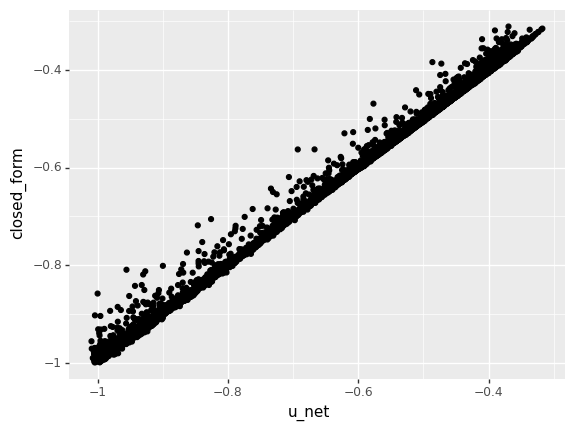

<ggplot: (8746915137901)>

time: 601 ms (started: 2022-07-08 22:33:10 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

8.89245682532021e-05

time: 4.93 ms (started: 2022-07-08 22:33:16 +00:00)


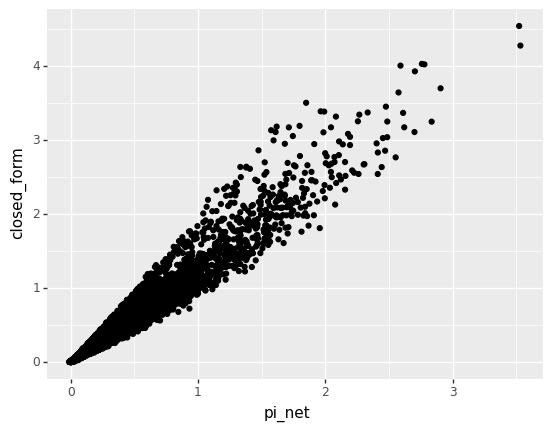

<ggplot: (8746914994253)>

time: 710 ms (started: 2022-07-08 22:33:28 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.0264241100276824

time: 5.05 ms (started: 2022-07-08 22:33:32 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DGM'

Mounted at /content/drive
time: 24 s (started: 2022-07-08 14:30:39 +00:00)


In [ ]:
#torch.save(trainMertonAlloc.net.state_dict(), os.path.join(filepath, 'unet_trained_15k_epochs.pt'))
#torch.save(mequation.pi_net.state_dict(), os.path.join(filepath, 'pi_net_trained_15k_epochs_4ep.pt'))

time: 14.2 ms (started: 2022-07-08 07:19:57 +00:00)


In [ ]:
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.load_state_dict(torch.load(os.path.join(filepath, 'unet_trained_15k_epochs.pt')))

<All keys matched successfully>

time: 589 ms (started: 2022-07-08 14:31:30 +00:00)


In [ ]:
u_net.to('cuda:0')

MertonUtilityNet(
  (fc_input): Linear(in_features=5, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 4.95 ms (started: 2022-07-08 14:31:57 +00:00)


In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi

In [ ]:
2+2

4